In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
# Load dataset
df= pd.read_csv("C:/Users/NIKITA//Downloads/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Exploratory Data analysis

In [3]:
# Checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
# Basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
# unique values of the data
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [6]:
# Drop missing values
df=df.dropna()
df.shape

(3774, 12)

In [7]:
# Convert date_added column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [8]:
df.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
day_added                int64
month_added              int64
year_added               int64
dtype: object

In [9]:
df_movies=df[df["type"]=="Movie"]
df_tvshows=df[df["type"]=="TV Shows"]

# Data Visualization

Mostly watched type on netflix

In [10]:
#Mostly watched type on netflix
df.type.value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

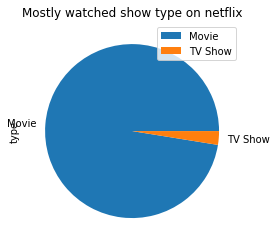

In [11]:
df.type.value_counts().plot(kind='pie')
plt.title("Mostly watched show type on netflix")
plt.legend()
plt.show()

Movies are mostly watched show type on netflix.

In [12]:
# Top 10 directors of netflix
df.director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Jay Karas                 13
Jay Chapman               12
Marcus Raboy              12
Martin Scorsese            9
Steven Spielberg           9
David Dhawan               8
Johnnie To                 8
Lance Bangs                7
Shannon Hartman            7
Name: director, dtype: int64

Text(0.5, 1.0, 'Plot of Rating')

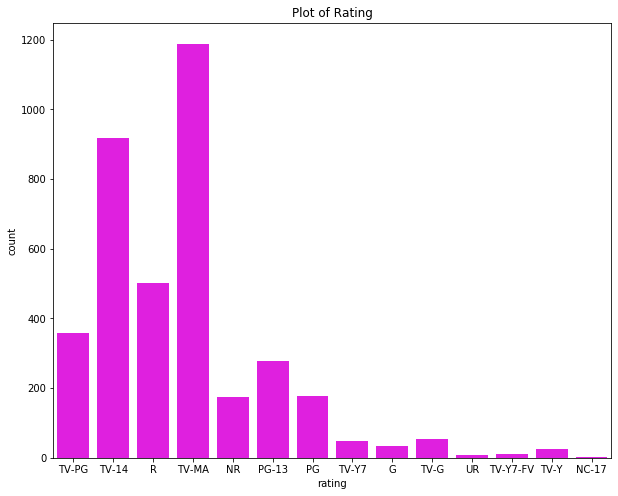

In [13]:
# Plot of Rating
plt.figure(figsize=(10,8))
sns.countplot(df.rating,color='magenta')
plt.title("Plot of Rating")

TV-MA is the highest rating of the dataset.

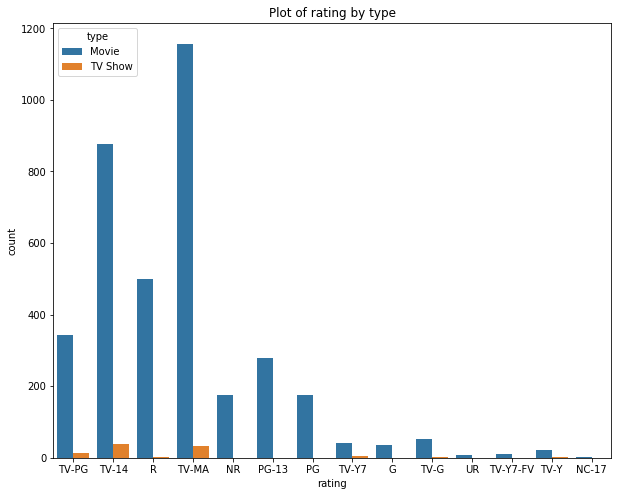

In [14]:
# Plot of rating by type
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title("Plot of rating by type")
plt.show()

In [15]:
# Which countries releases most movies in each year?
df.country.value_counts()

United States                                 1323
India                                          707
United Kingdom                                 152
Canada                                          78
Spain                                           72
                                              ... 
Philippines, Singapore                           1
United States, Nicaragua                         1
United States, India, United Arab Emirates       1
Switzerland                                      1
Brazil, France, Germany                          1
Name: country, Length: 433, dtype: int64

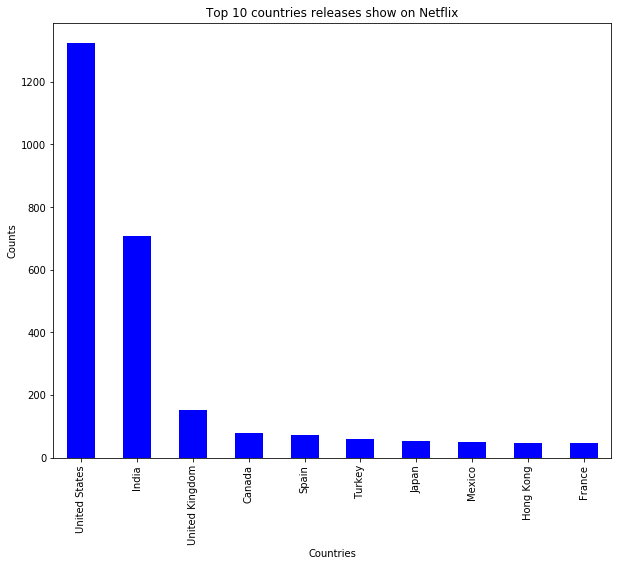

In [16]:
# Top 10 countries releases show on Netflix
plt.figure(figsize=(10,8))
df.country.value_counts().head(10).plot(kind='bar',color='blue')
plt.title("Top 10 countries releases show on Netflix")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.show()

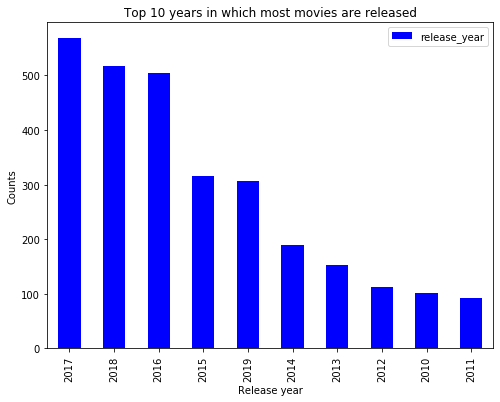

In [17]:
# How many movies are released in each year?
# Top 10 years in which most movies are released
plt.figure(figsize=(8,6))
df_movies.release_year.value_counts().head(10).plot(kind='bar',color='blue')
plt.title("Top 10 years in which most movies are released")
plt.xlabel("Release year")
plt.ylabel("Counts")
plt.legend()
plt.show()

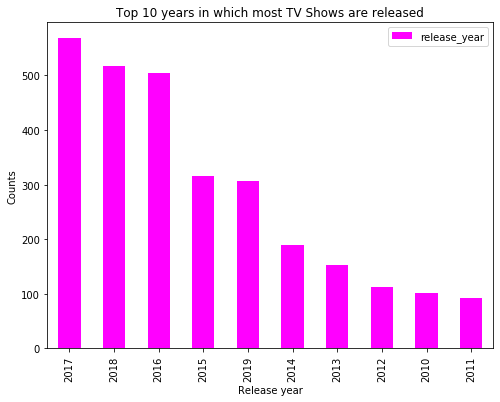

In [18]:
# How many tv shows are released in each year?
# Top 10 years in which most tv shows are released
plt.figure(figsize=(8,6))
df_movies.release_year.value_counts().head(10).plot(kind='bar',color='magenta')
plt.title("Top 10 years in which most TV Shows are released")
plt.xlabel("Release year")
plt.ylabel("Counts")
plt.legend()
plt.show()

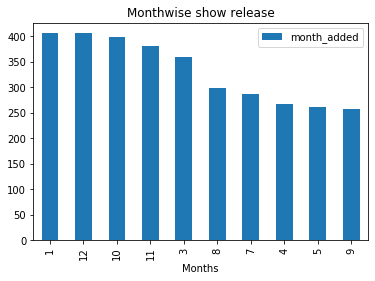

In [19]:
# In which month most of the shows release?
df['month_added'].value_counts().head(10).plot(kind='bar')
plt.title("Monthwise show release")
plt.legend()
plt.xlabel("Months")
plt.show()

In January and december, most of the show releases.

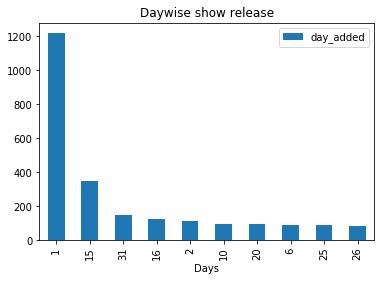

In [20]:
# In which month most of the shows release?
df['day_added'].value_counts().head(10).plot(kind='bar')
plt.title("Daywise show release")
plt.legend()
plt.xlabel("Days")
plt.show()

In [21]:
# What most common movie category release?
listed_in=df.listed_in.value_counts()
listed_in

Dramas, International Movies                                        237
Stand-Up Comedy                                                     234
Dramas, Independent Movies, International Movies                    184
Comedies, Dramas, International Movies                              168
Documentaries                                                       136
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
Sci-Fi & Fantasy                                                      1
Comedies, Music & Musicals, Romantic Movies                           1
Comedies, Dramas, Music & Musicals                                    1
Crime TV Shows, Docuseries                                            1
Name: listed_in, Length: 296, dtype: int64

In [22]:
print('Most common category of movie release\nDramas, International Movies :',max(listed_in))

Most common category of movie release
Dramas, International Movies : 237


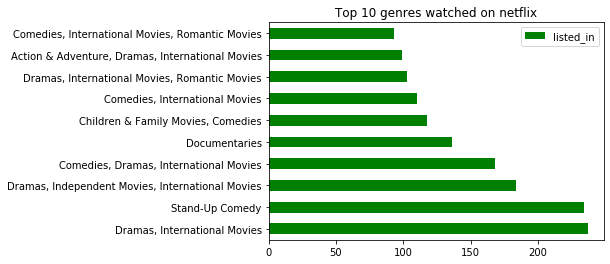

In [23]:
# Top 10 genres watched on netflix
listed_in.head(10).plot(kind='barh',color="g")
plt.title("Top 10 genres watched on netflix")
plt.legend()

Most common category of movie release is Dramas, International Movies : 237

In [24]:
# To install wordcloud
# !pip install wordcloud

# Wordcloud

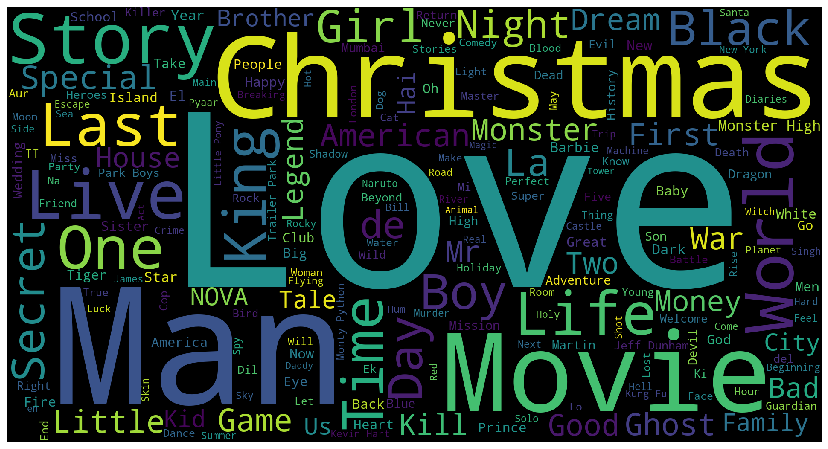

In [25]:
from wordcloud import WordCloud

plt.subplots(figsize=(15,8))
wordcloud = WordCloud( 
                       background_color='Black',width=1910,
                       height=1020).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

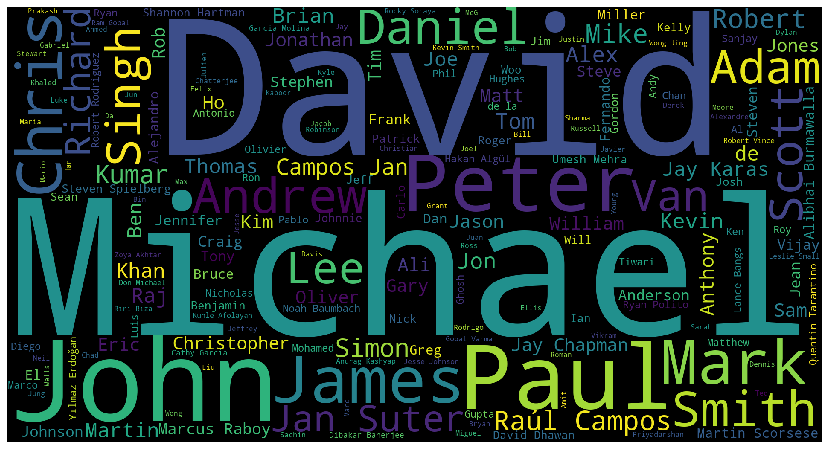

In [26]:
plt.subplots(figsize=(15,8))
wordcloud = WordCloud( 
                       background_color='Black',width=1910,
                       height=1020).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()